# Основы математической статистики
### Базовые понятия и методы проверки статистических гипотез

### Часть 2. Параметрические критерии

### Содержание:

1. Описание данных:
    * Нормальное распределение, выборочные оценки.
    * Проврка гипотез: ошибки первого и второго рода.
    * Статистические критерии, критерии согласия.
    * Чувствительность критерия.
2. Параметрические критерии:
    * Дисперсионный анализ.
    * Критерий Стьюдента.
    * Связанные выборки.
    * Множественные сравнения.
3. Анализ качественных признаков:
    * Z-критерий.
    * Таблицы сопряженности: критерий $\chi^2$.
    * Точный критерий Фишера.
4. Доверительные интервалы:
    * Построение доверительных интервалов.
    * Проверка гипотез с помощью доверительных интервалов.
5. Непараметрические критерии:
    * Критерий Манна—Уитни.
    * Критерий Уилкоксона.

<br>

<hr>

<br>

### Несвязанные и связанные выборки

**Несвязанными (независимыми) выборками** называются выборки, полученные независимо друг от друга. Например, для проверки эффективности лекарственного средства исследователи собрали две группы, одной давали лекарство, второй плацебо. Это пример несвязанных выборок.

**Связанными (зависимыми) выборками** называются выборки, полученные в строгой зависимости друг от друга. Например, для проверки эффективности лекарственного средства исследователи выделили **одну** группу людей, и замерили их показатели исследумеого параметра до приема препарата, и после приема. При анализе имеем две выборки, однако они относятся к одним и тем же объектам (в данном случае это одни и те же люди).

Критерии для связанных и несвязанных выборок несколько различаются. Для начала рассмотрим независимые.

### Дисперсионный анализ

**Дисперсионный анализ (ANOVA, ANalysis Of VAriance)** &mdash; метод в математической статистике, направленный на поиск зависимостей в экспериментальных данных путём исследования значимости различий в средних значениях. Суть дисперсионного анализа сводится к изучению влияния одной или нескольких независимых переменных, обычно именуемых факторами, на зависимую переменную. Зависимые переменные представлены значениями абсолютных шкал. Независимые переменные являются номинативными (шкала наименований), то есть отражают групповую принадлежность, и могут иметь две или более градации (или уровня). Например, мы можем исследовать, как зависит среднее число кликов пользователя по элементам интерфейса (зависимая переменная) от различных вариантов реализации данного интерфейса (фактор, независимая переменная).

В зависимости от типа и количества переменных различают:

* однофакторный и многофакторный дисперсионный анализ (одна или несколько независимых переменных);
* одномерный и многомерный (MANOVA) дисперсионный анализ (одна или несколько зависимых переменных);
* дисперсионный анализ с постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов.

Исходными положениями дисперсионного анализа являются:

* нормальное распределение значений изучаемого признака в генеральной совокупности;
* равенство дисперсий в сравниваемых генеральных совокупностях (гомоскедастичность);
* случайный и независимый характер выборки.

Для подтверждения положения о равенстве дисперсий обычно применяется критерий Ливена (Levene's test) или критерий Бартлетта. В случае отвержения гипотезы о равенстве дисперсий основной анализ неприменим.

Рассмотрим критерий, играющий важную роль в дисперсионном анализе &mdash; **F-критерий (F-тест).**

Нулевой гипотезой является утверждение о равенстве средних значений:

$$ H_{0}{:}\quad \mu _{1}=\mu _{2}=\dots =\mu _{j}. $$

При отклонении нулевой гипотезы принимается альтернативная гипотеза о том, что не все средние равны, то есть имеются, по крайней мере, две группы, отличающиеся средними значениями:

$$ H_{1}{:}\quad \mu _{1}\neq \mu _{2}\neq \dots \neq \mu _{j}.$$

Процедура проверки состоит в определении соотношения систематической (межгрупповой) дисперсии к случайной (внутригрупповой) дисперсии в измеряемых данных. Соотношение межгрупповой и внутригрупповой дисперсий имеет распределение Фишера.

Пусть выборка объёмом $n$ случайной величины $X$ разделена на $k$ групп с количеством наблюдений $n_{i}$ в i-ой группе. Тогда статистика F-критерия имеет вид:

$$ F = \frac{s_{exp}^2}{s_{unexp}^2} \sim F(k-1, n-k), $$

где:

$ s_{exp}^2 = \frac{1}{k-1}\sum_{i=1}^{k}n_i(\bar{X_i} - \bar{X})^2 $ &mdash; межгрупповая (объяснённая, систематическая) дисперсия, $\bar{X_i}$ &ndash; среднее в каждой группе, $\bar{X}$ &ndash; среднее средних;

$ s_{unexp}^2 = \frac{1}{n-k}\sum_{i=1}^{k}\sum_{j=1}^{n_i}(X_{ij} - \bar{X_i})^2 $ &mdash; внутригрупповая (необъяснённая, случайная) дисперсия, то есть среднее выборочных дисперсий всех групп.

Если $ F > F_{\alpha}(k-1, n-k) $, то нулевая гипотеза отклоняется при уровне значимости $\alpha$.

#### Пример

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def error_bar(sample_groups):
    x = np.mean(sample_groups, axis=1)
    y = np.arange(len(sample_groups))
    e = np.std(sample_groups, axis=1)

    plt.errorbar(x, y, xerr=e, linestyle='None', marker='o')
    plt.errorbar(np.mean(x), len(y) ,xerr=np.std(x), linestyle='None', marker='o')
    plt.show()
    
def get_random_sample(size, a=0, b=1):
    return (b-a) * np.random.sample(size) + a

Приведем следующий пример. Владелец магазина пытается определить наиболее эффективное расположение стеллажей. У него есть данные по среднему чеку покупателей для 4-ех различных планировок магазина (очевидно из кода, что выборки берутся из одной совокупнсти, но сделаем вид, что мы этого не видели и не знаем, как они на самом деле распределены, то есть у нас есть только информация, заключенная в списке ```sample_groups```). Тогда, нулевая гипотеза состоит в том, что все группы взяты из одного распределния, то есть статистически значимых различий между ними нет.

In [3]:
ave_income = stats.norm(loc=550, scale=150).rvs(1000)
sample_groups = [np.random.choice(ave_income, size=40) + get_random_sample(40, -50, 50)
                 for i in range(4)]

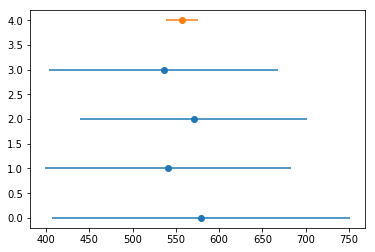

In [4]:
error_bar(sample_groups)

Представив себя на месте владельца магазина (который обладает только списком ```sample_groups```), можем на наглядном error_bar увидеть, что межгрупповая дисперсия (дисперсия средних, оранжевый показатель) заметно меньше внутригрупповой (дисперсии в выборках), что подтверждает нулевую гипотезу. Для проверки данной догадки, воспользуемся дисперсионным анализом.

Так как исследователь изначально не знает, распределены ли выборки нормально, необходимо применить критерий согласия. Это необходимо, так как F-тест работает только с нормальными выборками.

In [5]:
is_norm = True
for group in sample_groups:
    W, p_norm = stats.shapiro(group)
    if p_norm < 0.05:
        is_norm = False
        break

if is_norm:
    print('Гипотеза о нормальности принимается', end=' ')
else:
    print('Гипотеза о нормальности отвергается', end=' ')
    
print('при уровне значимости 0.05')

Гипотеза о нормальности принимается при уровне значимости 0.05


Теперь проверим вспомогательную гипотезу о равенстве дисперсий с помощью критерия Ливена:

In [6]:
stats.levene(*sample_groups)

LeveneResult(statistic=1.9714949521346041, pvalue=0.12051400450946022)

Гипотеза о равенстве дисперсий принимается при уровне значимости $\alpha = 0.05$.

Теперь применим F-критерий:

In [7]:
F, p_anova = stats.f_oneway(*sample_groups)
print("Значение статистики: " + str(F))
print("p-value: " + str(p_anova))

Значение статистики: 0.8462441346468889
p-value: 0.47055048789551923


Гипотеза о равенстве средних принимается при уровне значимости $\alpha = 0.05$. Отсюда следует, что статистически значимых различий между рассмотренными 4-мя расположениями стеллажей в магазине нет.

<br>

### Критерий Стьюдента

**t-критерий Стьюдента** — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в **двух** выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига).

Все разновидности критерия Стьюдента являются параметрическими и основаны на дополнительном предположении о нормальности выборки данных. Поэтому перед применением критерия Стьюдента рекомендуется выполнить проверку нормальности. Если гипотеза нормальности отвергается, можно проверить другие распределения, если и они не подходят, то следует воспользоваться непараметрическими статистическими тестами.

t-тест бывает **одновыборочным и двувыборочным**. **Одновыборочный** применяется для проверки нулевой гипотезы $ H_{0}:\mu=m $ о равенстве математического ожидания $ \mu $ некоторому известному значению $ m $. Статистикой теста является:

$$ t={\frac {\bar{X}-m}{\frac{s_{X}}{\sqrt{n}}}}, \:\;\; s_{X}^{2}=\frac{1}{(n-1)}\sum_{{i=1}}^{n}(X_{i}-\bar X)^{2}$$

При нулевой гипотезе распределение этой статистики $t(n-1)$. Следует отметить, что критерий достаточно устойчив к отклонениям выборки от нормальности, однако всё еще важна независимость наблюдений. При превышении значения статистики по абсолютной величине критического значения данного распределения (при заданном уровне значимости) нулевая гипотеза отвергается.

**Двувыборочный t-критерий:** пусть имеются две независимые выборки объемами $n_{1},n_{2}$ нормально распределенных случайных величин $X_{1},X_{2}$ с одинаковыми дисперсиями. Необходимо проверить по выборочным данным нулевую гипотезу равенства математических ожиданий этих случайных величин $H_{0}:~\mu_{1}=\mu_{2}$. Статистика суть отношение разности выборочных средних к стандартной ошибке разности выборочных средних и выглядит следующим образом:

$$ t = \frac{\bar{X}_{1}-\bar{X}_{2}} {s_{p} \cdot \sqrt{\frac{1}{n_{1}}+\frac {1}{n_{2}}}},$$

где $s_p $ выражается через выборочные дисперсии выборок $s_{X_1}, s_{X_2}$ следующим образом:

$$ s_{p} = \sqrt{\frac{\left(n_{1}-1\right)s_{X_{1}}^{2} + \left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}. $$

При справедливости нулевой гипотезы данная статистика имеет распределение $t(n_{1}+n_{2}-2)$. Стоит отметить, что критерий Стьюдента является частным случаем дисперсионного анализа. В случае, описаном выше, связь с F-тестом выражется следующим образом: $ F = t^2 $.

Вполне очевиден факт, что далеко не всегда у экспериментальных выборок одинаковые дисперсии. Задача сравнения средних двух нормально распределённых выборок при неизвестных и неравных дисперсиях известна как **проблема Беренса-Фишера.** Точного решения этой задачи до настоящего времени нет, на практике используются различные приближения. Познакомимся с одним из таких, называемым **критерием Уэлча (Welch's t-test)**, который является адаптацией уже знакомого t-теста. Статистика критерия:

$$ t={\frac{\bar X_{1}-\bar X_{2}}{{\sqrt{{\frac{s_{1}^{2}}{n_{1}}}+{\frac{s_{2}^{2}}{n_{2}}}}}}}, $$

где $s_1, s_2$ &ndash; выборочные оценки дисперсии. Эта статистика при справедливости нулевой гипотезы имеет распределение $t(\nu)$, где 

$$\nu \approx \frac{\left(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\right)^2}{\frac{s_{1}^{4}}{n_{1}^{2}(n_1-1)} + \frac{s_{2}^{4}}{n_{2}^{2}(n_2 - 1)}} $$

#### Пример

Представим, что мы хотим изучить, оказывает ли влияение новая недавно разработанная система электронной регистрации на прием к врачу на среднее время, проведенное пациентом в ожидании приема. Пусть есть две выборки (как и в прошлый раз, закроем глаза на то, как они получаются) со средним временем ожидания приема за последний месяц в двух разных клиниках; в одной из них есть система электронной регистрации, а в другой &ndash; нет:

In [8]:
group_1 = stats.norm(loc=12, scale=7).rvs(30)
group_2 = stats.norm(loc=7, scale=4).rvs(30)

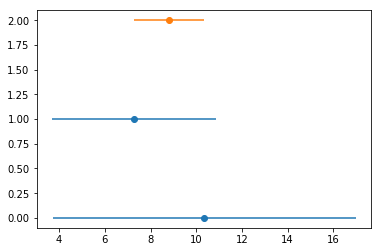

In [9]:
error_bar([group_1, group_2])

Применим критерий Стьюдента, предварительно сделав тест на равенство дисперсий:

In [10]:
stats.levene(group_1, group_2)

LeveneResult(statistic=8.992479279146405, pvalue=0.003988427046038371)

Гипотеза о равенстве дисперсий отклоняется при уровне значимости $\alpha=0.05$. Поэтому используем критерий Уэлча:

In [11]:
t, p_t = stats.ttest_ind(group_1, group_2, equal_var=False)
print("Значение статистики: " + str(t))
print("p-value: " + str(p_t))

Значение статистики: 2.2014778661670382
p-value: 0.032914875335623775


Так как $p < \alpha$, то отвергаем нулевую гипотезу при уровне значимости $\alpha=0.05$.

### Связанные выборки

Рассмотрим случай, когда приходится исследовать статистические отклонения среднего значения какой либо величины для одной группы, но в разных условиях. Использование критериев для несвязанных выборок в данном случае может привести к ошибке. Сформулируем **парный критерий Стьюдента:**

$$ t = \frac{\bar{X}_{D}-d_{0}}{\frac {s_{D}}{\sqrt {n}}}, $$

где $\bar{X}_{D}$ &ndash; среднее разности между соотвествующими объектами выборок, $d_{0}$ &ndash; истинное среднее изменение ($d_{0}=0$ при правдивости нулевой гипотезы), $s_{D}$ &ndash; стандартное отклонение разности. Статистика подчиняется распределению $t(n-1)$. Стоит отметить, что если обычный критерий Стьюдента требует нормального распределения самих данных, то парный критерий Стьюдента требует нормального распределения их изменений.

Теперь рассмотрим **модификацию F-теста на случай парных выборок.** Пусть имеются $k$ групп с одинаковым числом $n$ объектов в каждой. Тогда:

$$ F = (n-1) \frac{\sum_{i=1}^{k}(\bar{T_i} - \bar{X})^2}{\frac{1}{n}\sum_{i=1}^{k}\sum_{j=1}^{n} (X_{ij} - \bar{X_j})^2 - \sum_{i=1}^{k}(\bar{T_i} - \bar{X})^2}, $$

где $\bar{X} = \frac{1}{nk}\sum_{i=1}^{k}\sum_{j=1}^{n}X_{ij}$ &ndash; общее среднее, $\bar{T_i} = \frac{1}{n}\sum_{j=1}^{n}X_{ij}$ &ndash; среднее в группе, $\bar{X_j} = \frac{1}{k}\sum_{i=1}^{k}X_{ij}$ &ndash; среднее значение между группами. Статистика имеет распределение $F(n-1, (n-1)(m-1))$. Недостатком является то, что размер групп должен быть равен друг другу, поэтому этот метод непопулярен. Вместо него можно использовать критерий Стьюдента с поправками на множественные сравнения.

#### Пример

Пусть некто разработал новую диету для похудения. Для её тестирования набираются, например, 15 человек. Их вес замеряется, а затем они подвергаются диете в течении некоторого времени, и их вес снова замеряется. С помощью статистических методов необходимо проверить, работает ли диета.

In [12]:
group_before = stats.norm(loc=89, scale=8).rvs(15)
group_after = stats.norm(loc=76, scale=16).rvs(15)

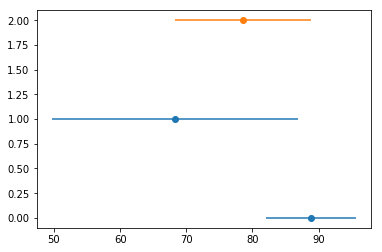

In [13]:
error_bar([group_before, group_after])

Применим парный критерий Стьюдента:

In [14]:
t_rel, p_rel = stats.ttest_rel(group_before, group_after)
print("Значение статистики: " + str(t_rel))
print("p-value: " + str(p_rel))

Значение статистики: 3.8108513977924714
p-value: 0.0019094612444843352


Результат: различия статистически значимы при уровне $\alpha = 0.05$.

### Множественные сравнения

Используя дисперсионный анализ, мы можем проверить гипотезу о равенстве средних у более чем 2-ух выборок. Однако, при отклонении гипотезы о равенстве, он не дает никакой информации о том, какая именно выборка выделяется. Отсюда приходит идея использовать критерий Стьюдента для попарного сравнения групп. При этом вступает в силу **эффект множественных сравнений**. При проверке статистических гипотез для каждого утверждения, представляющего собой вывод об отвержении гипотезы, возникает возможность появления ошибки (ложного отклонения гипотезы, ошибки первого рода). При построении $m$ выводов вероятность того, что хотя бы один из них будет неверным, равна $P = 1-(1-\alpha )^{m}$, что достаточно велико уже при небольших $m$ (например, при $m=5$ она равна $\approx 22{,}6\%$).

Для поиска групп, отличающехся от остальных, применяются **методы множественного сравнения.** Все они основаны на критерии Стьюдента, но учитывают, что сравнивается более одной пары средних. Подход состоит в том, чтобы в первую очередь с помощью дисперсионного анализа проверить нулевую гипотезу о равенстве всех средних, а уже затем, если нулевая гипотеза отвергнута, выделить среди них отличные от остальных, используя для этого методы множественного сравнения. Простейший из методов множественного сравнения &mdash; введение **поправки Бонферрони.** 

Метод поправки Бонферрони утверждает, что для уменьшения ошибок первого рода, необходимо отклонить те гипотезы, для которых 

$$p < \frac{\alpha}{m},$$

где $m$ &ndash; общее число гипотез (сколько раз применяется критерий при уровне значимости $\alpha$). Например, при трехкратном сравнении уровень значимости должен быть $\frac{0,05}{3} = 0.017\%.$ Поправка Бонферрони хорошо работает, если число сравнений невелико. При увеличении $m$ в результате применения поправки Бонферрони мощность статистической процедуры резко уменьшается &ndash; шансы отклонить неверные гипотезы падают. Рекомендуется $m < 8$.

Также можно использовать слегка менее строгую **Šidák correction**, то есть отклонять гипотезу при:

$$ p < 1 - (1-\alpha)^{1/m}. $$

Еще одним методом коррекции уровня значимости при множественном тестировании является **метод Холма (поправка Холма — Бонферрони)**, который заключается в следующем. Пусть $ p_{(1)}\leq \,...\,\leq p_{(m)} $ &ndash; уровни значимости $p_{i}$, упорядоченные от наименьшего к наибольшему, $H_{(1)},...,H_{(m)}$ &ndash; соответствующие $p_{(i)}$ гипотезы. Тогда:
* Шаг 1. Если $ p_{(1)}\geq {\frac {\alpha }{m}} $, принять гипотезы $ H_{(1)},...,H_{(m)} $ и остановиться. Иначе, если $ p_{(1)}<{\frac {\alpha }{m}} $, отвергнуть гипотезу $H_{(1)}$ и продолжить проверку оставшихся гипотез на уровне значимости $\frac {\alpha }{m-1} $;
* Шаг 2. Если $ p_{(2)}\geq {\frac {\alpha }{m-1}} $, принять гипотезы $ H_{(2)},...,H_{(m)} $ и остановиться. Иначе, если $ p_{(2)}<{\frac {\alpha }{m-1}} $, отвергнуть гипотезу $ H_{(2)} $ и продолжить проверку оставшихся гипотез на уровне значимости $ \frac {\alpha }{m-2} $;
* И так далее.

В качестве более мощных аналогов критерия Стьюдента с поправкой Бонферрони можно использовать: 
* **критерий Ньюмена–Кейлса**;
* **критерий Тьюки**;
* **критерий Даннета**.

Их описание можно найти в источнике [2].

### Одновыборочный тест на равенство дисперсий*

В качестве дополнения к описанным выше параметрическим критериям стоит добавить одну из разновидностей **критерия** $\mathbf{\chi^2}$. Основы данного класса критериев будут описаны позже, однако данный тест более подходит для данного раздела.

Итак, пусть имеется выборка из нормального распределения размера $n$. Требуется проверить гипотезу $ H_{0}:\sigma=\sigma_0 $ о равенстве дисперсии $ \sigma $ некоторому известному значению $ \sigma_0 $. Статистикой теста является:

$$ \chi^2 = (n-1)\frac{s^2}{\sigma^2_0}, $$

где $s^2$ &ndash; выборочная дисперсия. Статистика критерия подчиняется распределению $\chi^2$ с $n-1$ степенью свободы.

<br>

<br>

### Примечание

**Автор: Болгарин Максим. Физический факультет, МГУ, 2019г.**

Данной работой я хотел донести до начинающих программистов и аналитиков основы математической статистики на базовом и понятном для каждого уровне. Моей целью не было просто переписать информацию из учебников и интернет статей, а сгруппировать её в понятном и информативном виде.

#### Источники:
1. [Wikipedia](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)
2. [Стентон Гланц - Медико-биологическая статистика](https://yadi.sk/i/6A1LLMU78QqNPg)
3. [Кобзарь А. И. - Прикладная математическая статистика](https://yadi.sk/i/GDGalzNXL0HsMA)
4. [MachineLearning](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)